1. To test the scheduling functionality a simple SFG is available in the file examples/schedulingexample.py

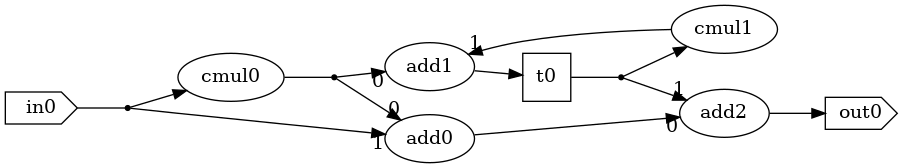

In [39]:
"""
====================================================
Example SFG used for scheduling in the TSTE87 course
====================================================

Node numbering from the original SFG used with the Matlab toolbox::

    sfg=addoperand([],'in',1,1);
    sfg=addoperand(sfg,'constmult',1,1,2,0.25);
    sfg=addoperand(sfg,'constmult',2,4,5,0.75);
    sfg=addoperand(sfg,'add',1,[2 1],6);
    sfg=addoperand(sfg,'add',2,[2 5],3);
    sfg=addoperand(sfg,'add',3,[6 4],7);
    sfg=addoperand(sfg,'delay',1,3,4);
    sfg=addoperand(sfg,'out',1,7);
"""
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output

node1 = Input()
node2 = node1 * 0.25
node6 = node2 + node1
node4 = Delay()
node7 = node6 + node4
out = Output(node7)
node5 = 0.75 * node4
node3 = node2 + node5
node4 <<= node3

sfg = SFG([node1], [out], name="Scheduling example")
# %%
# The SFG looks like
sfg

a) Compute an initial schedule and print it. Assume latency = execution time = 2 time units for both additions and multiplications. 

/home/raswa151/courses/tste87/B-ASIC/b_asic/schedule.py:1153: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


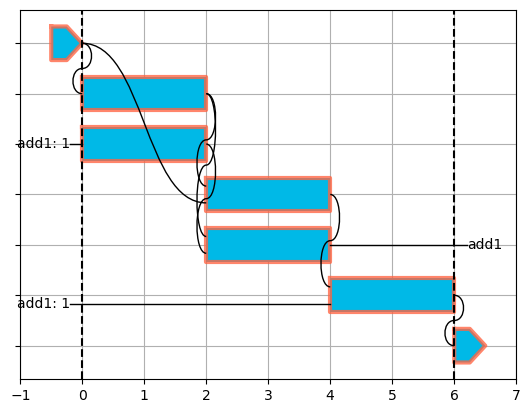

In [40]:
from b_asic.schedule import Schedule 
from b_asic.core_operations import Addition, ConstantMultiplication

sfg.set_latency_of_type(Addition.type_name(), 2)
sfg.set_execution_time_of_type(Addition.type_name(), 2) 

sfg.set_latency_of_type(ConstantMultiplication.type_name(), 2)
sfg.set_execution_time_of_type(ConstantMultiplication.type_name(), 2) 

schedule = Schedule(sfg, cyclic=True)
schedule.show()

b) Print the possible changes in start times. 

In [41]:
slacks = schedule.slacks("add0")
print("add0", slacks)
slacks = schedule.slacks("add1")
print("add1", slacks)
slacks = schedule.slacks("add2")
print("add2", slacks)
slacks = schedule.slacks("cmul0")
print("cmul0", slacks)
slacks = schedule.slacks("cmul1")
print("cmul1", slacks)
#schedule.get_possible_time_resolution_decrements() 
#schedule.increase_time_resolution(2)
#schedule.()

add0 (0, 0)
add1 (0, 2)
add2 (0, 0)
cmul0 (0, 0)
cmul1 (2, 0)


c) Reschedule so that at most one multiplication and one addition are executed in parallel, with a schedule time of at most six time units. 

In [42]:
#new = schedule.edit()
#new

TypeError: unsupported operand type(s) for +: 'float' and 'str'

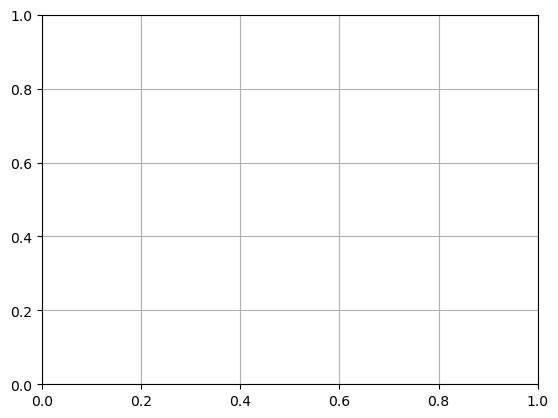

In [44]:
#schedule.move_operation("add1", 2) 
#schedule.move_operation("cmul1", 2) 
schedule.show("3_1_sched.bsc")